# Heart Failure

Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde. On estime que 17,9 millions de personnes en meurent chaque année, ce qui représente 31 % de tous les décès dans le monde.
L'insuffisance cardiaque est un événement courant causé par les MCV et cet ensemble de données contient 12 caractéristiques qui peuvent être utilisées pour prédire la mortalité par insuffisance cardiaque.

La plupart des maladies cardiovasculaires peuvent être évitées en s'attaquant aux facteurs de risque comportementaux tels que le tabagisme, une alimentation malsaine et l'obésité, l'inactivité physique et la consommation nocive d'alcool, au moyen de stratégies à l'échelle de la population.

Les personnes atteintes d'une maladie cardiovasculaire ou présentant un risque cardiovasculaire élevé (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une prise en charge précoces, pour lesquelles un modèle d'apprentissage automatique peut être d'une grande utilité.


L'objectif : construire un modèle capable de prédire les accidents cardiaques.

## Import des librairies

In [1]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

## Import des données

Chargez le dataset depuis Kaggle:

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Observation et préparation des données

A vous de jouer ! Postez vos plus beaux graphes sur slack !

A minima, faire une étude sur l'age, le genre, les fumeurs, les diabetiques. 

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df['DEATH_EVENT'].sum()/df.shape[0]

0.3210702341137124

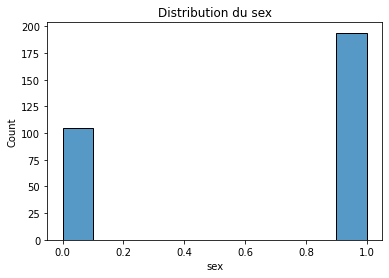

In [9]:
plt.figure()
plt.title('Distribution du sex')
sns.histplot(x='sex',data=df)
plt.show()

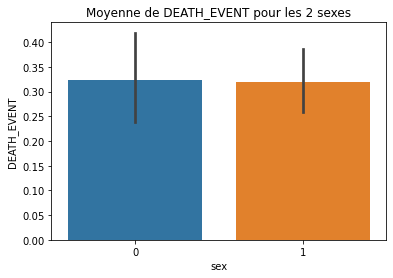

In [10]:
plt.figure()
plt.title('Moyenne de DEATH_EVENT pour les 2 sexes')
sns.barplot(x='sex',y='DEATH_EVENT',data=df)
plt.show()

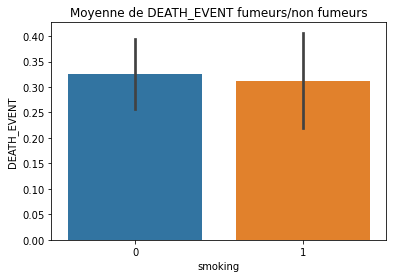

In [11]:
plt.figure()
plt.title('Moyenne de DEATH_EVENT fumeurs/non fumeurs')
sns.barplot(x='smoking',y='DEATH_EVENT',data=df)
plt.show()

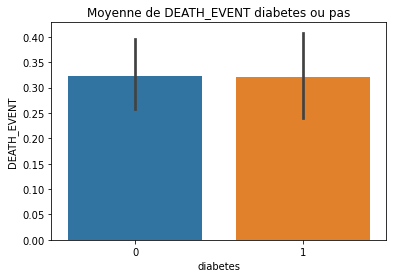

In [12]:
plt.figure()
plt.title('Moyenne de DEATH_EVENT diabetes ou pas')
sns.barplot(x='diabetes',y='DEATH_EVENT',data=df)
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

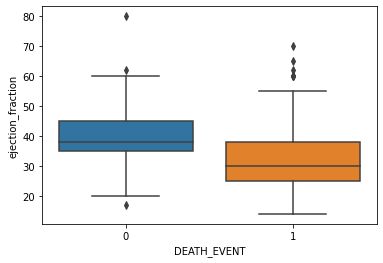

In [13]:
sns.boxplot(x="DEATH_EVENT",y="ejection_fraction",data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

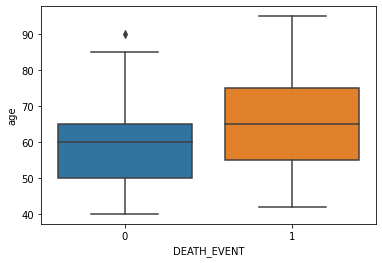

In [14]:
sns.boxplot(x="DEATH_EVENT",y="age",data=df)

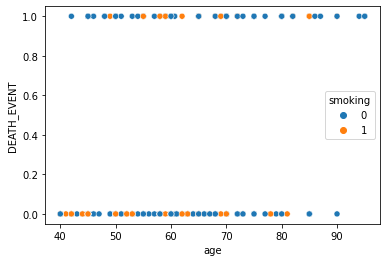

In [15]:
plt.figure()
sns.scatterplot(x = 'age',y = 'DEATH_EVENT', hue = 'smoking', data = df) 
plt.show()

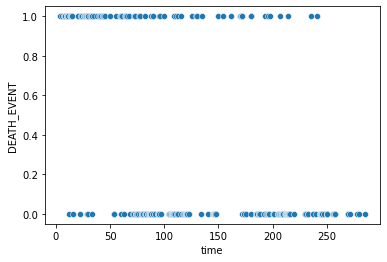

In [16]:
plt.figure()
sns.scatterplot(x = 'time',y = 'DEATH_EVENT', data = df) 
plt.show()

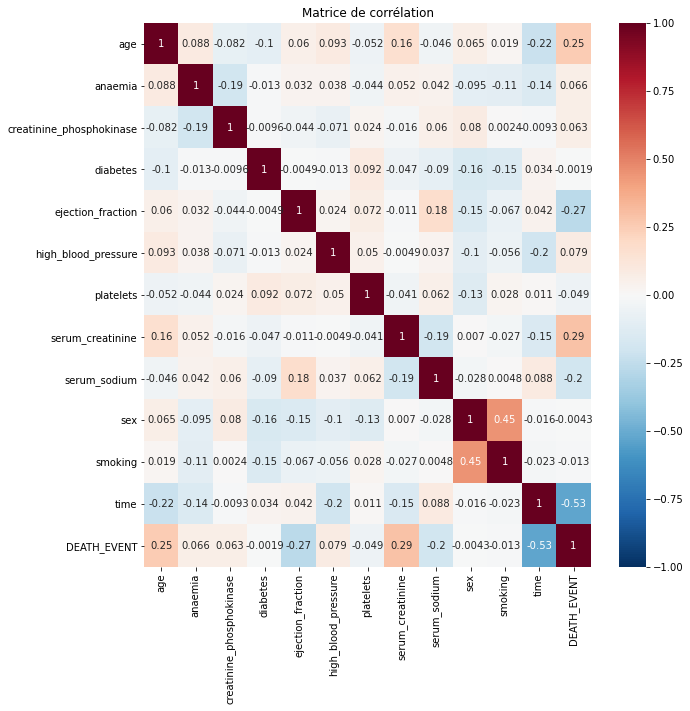

In [17]:
matrice_correlation = df.corr()

plt.figure(figsize=(10, 10))
plt.title("Matrice de corrélation")
sns.heatmap(matrice_correlation, cmap="RdBu_r", vmin=-1, center=0.0, annot=True)
plt.show()

Séparation des jeux de train/test

In [18]:
#X=df.drop('DEATH_EVENT',axis=1)
#X=df[['time','serum_creatinine','ejection_fraction','age','serum_sodium']]
#X=df[['time','ejection_fraction','serum_creatinine']]
X=df[['time','serum_creatinine','ejection_fraction']]
y=df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.2)

Scaling of the X for the KNN

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train) # va chercher pour chaque colonne le min et le max
# applique la normalisation sur le jeu de données
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

## Testez différents modèles de machine learning

Identifiez la mesure que vous souhaitez suivre. N'oubliez pas de regarder la matrice de confusion, observez le `recall`et la `precision` de vos modèles. Quel modèle vous semble le plus performant ?

In [20]:
def Result_model(X_test,y_test,model,verbose=1):
    y_pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)
    accu_score=accuracy_score(y_test, y_pred_test)
    if verbose==1:
        print('The size of training and test set :', X_train.shape , X_test.shape, y_train.shape, y_test.shape)
        print(f'Accuracy score of {model}: {accu_score}')
        print(classification_report(y_test,y_pred_test, target_names = ["Survived", "Dead"]))    
        plt.figure(figsize=(3,2))
        sns.heatmap(cm, xticklabels =["Survived", "Dead"] ,yticklabels =["Survived", "Dead"] , annot=True )
        plt.xlabel("Predicted")
        plt.ylabel("Real")
        plt.show()
    return(accu_score)

The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of LogisticRegression(): 0.8166666666666667
              precision    recall  f1-score   support

    Survived       0.79      0.94      0.86        35
        Dead       0.89      0.64      0.74        25

    accuracy                           0.82        60
   macro avg       0.84      0.79      0.80        60
weighted avg       0.83      0.82      0.81        60



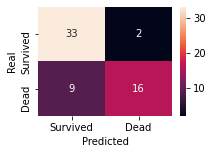

0.8166666666666667

In [21]:
# Logistic regression
model=LogisticRegression()
model.fit(X_train,y_train)
Result_model(X_test,y_test,model,verbose=1)

The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of KNeighborsClassifier(): 0.7833333333333333
              precision    recall  f1-score   support

    Survived       0.76      0.91      0.83        35
        Dead       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



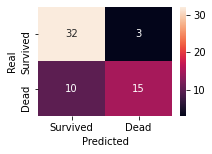

0.7833333333333333

In [22]:
# KNN
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)
Result_model(X_test_scaled,y_test,model,verbose=1)

The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of DecisionTreeClassifier(max_depth=15, random_state=0): 0.7333333333333333
              precision    recall  f1-score   support

    Survived       0.74      0.83      0.78        35
        Dead       0.71      0.60      0.65        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.73      0.73      0.73        60



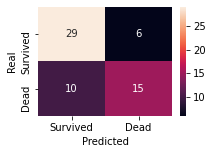

0.7333333333333333

In [23]:
# Decision Tree
model= DecisionTreeClassifier(random_state = 0, max_depth = 15)
#model=DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
model.fit(X_train,y_train)
Result_model(X_test,y_test,model,verbose=1)

The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of RandomForestClassifier(max_depth=15, max_features=0.5, random_state=42): 0.8166666666666667
              precision    recall  f1-score   support

    Survived       0.79      0.94      0.86        35
        Dead       0.89      0.64      0.74        25

    accuracy                           0.82        60
   macro avg       0.84      0.79      0.80        60
weighted avg       0.83      0.82      0.81        60



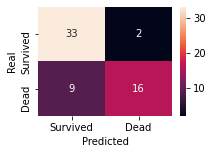

0.8166666666666667

In [24]:
# RandomForest
model = RandomForestClassifier(n_estimators = 100, random_state = 42,  max_depth=15,max_features=0.5)
model.fit(X_train,y_train)
Result_model(X_test,y_test,model,verbose=1)

## Optimisation des hyperparamètres

Appliquez GridSearchCV`et `RandomizedSearchCV`afin d'obtenir de meilleures performances sur le modèle que vous avez choisi précédemment.

### RandomForest

The best score for the training set are 0.8703059071729958
The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42): 0.7833333333333333
              precision    recall  f1-score   support

    Survived       0.76      0.91      0.83        35
        Dead       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



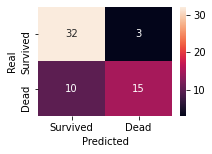

0.7833333333333333

In [25]:
# GridSearchCV
param_grid = {'n_estimators' : [10, 50, 100, 150, 200, 250, 300],
             'max_depth' : [3, 5, 7, 10, 13, 15, 20]}
model_rf = RandomForestClassifier(random_state = 42)
grid = GridSearchCV(model_rf,param_grid,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(f"The best score for the training set are {grid.best_score_}")
model = grid.best_estimator_
Result_model(X_test,y_test,model,verbose=1)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
The best score for the training set are 0.8703059071729958
The best parameters {'n_estimators': 200, 'max_depth': 3}
The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42): 0.7833333333333333
              precision    recall  f1-score   support

    Survived       0.76      0.91      0.83        35
        Dead       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



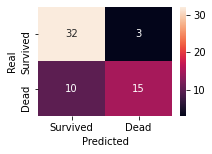

0.7833333333333333

In [26]:
# RandomizedSearchCV
model_rf = RandomForestClassifier(random_state = 42)
param_grid = {'n_estimators' : [10, 50, 100, 150, 200, 250, 300],
             'max_depth' : [3, 5, 7, 10, 13, 15, 20]}
grid =RandomizedSearchCV(model_rf,param_grid ,n_iter=25, cv =3,verbose = True,n_jobs = -1,random_state = 42)
grid.fit(X_train, y_train)
print(f"The best score for the training set are {grid.best_score_}")
print(f"The best parameters {grid.best_params_}")

model = grid.best_estimator_
Result_model(X_test,y_test,model,verbose=1)

### KNN

The best score for the training set are 0.8785864978902954
The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of KNeighborsClassifier(): 0.7833333333333333
              precision    recall  f1-score   support

    Survived       0.76      0.91      0.83        35
        Dead       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



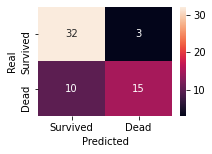

0.7833333333333333

In [27]:
# GridSearchCV
param_grid = {'n_neighbors' : np.arange(3,100,2)}
model_knn=KNeighborsClassifier()
grid = GridSearchCV(model_knn,param_grid,cv=3,n_jobs=-1)
grid.fit(X_train_scaled,y_train)
print(f"The best score for the training set are {grid.best_score_}")
model = grid.best_estimator_
Result_model(X_test_scaled,y_test,model,verbose=1)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
The best score for the training set are 0.8744198312236288
The size of training and test set : (239, 3) (60, 3) (239,) (60,)
Accuracy score of KNeighborsClassifier(n_neighbors=9): 0.7333333333333333
              precision    recall  f1-score   support

    Survived       0.72      0.89      0.79        35
        Dead       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



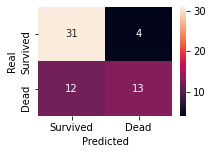

0.7333333333333333

In [28]:
# RandomizedSearchCV
param_grid = {'n_neighbors' : np.arange(3,100,2)}
model_knn=KNeighborsClassifier()
grid =RandomizedSearchCV(model_knn,param_grid ,n_iter=25, cv =3,verbose = True,n_jobs = -1,random_state = 42)
grid.fit(X_train_scaled, y_train)
print(f"The best score for the training set are {grid.best_score_}")
model = grid.best_estimator_
Result_model(X_test_scaled,y_test,model,verbose=1)